# import all librabries and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.preprocessing import scale
from scipy import stats
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings('ignore')

# load data

In [2]:
df=pd.read_csv('../input/cancer-data-2017/cancer2017.csv', engine='python')

# now basic overview of the data set.

In [3]:
df.shape

(51, 11)

this data set has 51 rows and 11 columns

In [4]:
#viewing columns...
df.columns

Index(['State', 'Brain/ nervous system', 'Female breast', 'Colon & rectum',
       'Leukemia', 'Liver', 'Lung & bronchus', 'Non-Hodgkin Lymphoma', 'Ovary',
       'Pancreas', 'Prostate'],
      dtype='object')

In [5]:
#redefine the column name for smooth analysis
df.columns = [c.strip() for c in df.columns.values.tolist()]
df.columns = [c.replace(' ','') for c in df.columns.values.tolist()] 
df.columns

Index(['State', 'Brain/nervoussystem', 'Femalebreast', 'Colon&rectum',
       'Leukemia', 'Liver', 'Lung&bronchus', 'Non-HodgkinLymphoma', 'Ovary',
       'Pancreas', 'Prostate'],
      dtype='object')

In [6]:

df.rename(columns = {'Brain/nervoussystem':'Brain', 'Lung&bronchus':'Lung','Non-HodgkinLymphoma':'Lymphoma','Colon&rectum':'Colon'}, inplace = True)

In [7]:
df.head()

,State,Brain,Femalebreast,Colon,Leukemia,Liver,Lung,Lymphoma,Ovary,Pancreas,Prostate
0,Alabama,320,650,940,420,470,"3,200",320,250,710,450
1,Alaska,�,70,100,�,60,280,�,�,80,50
2,Arizona,380,810,"1,020",550,660,"2,820",430,310,930,600
3,Arkansas,180,420,600,250,280,"2,160",210,150,430,260
4,California,1830,4440,5240,2610,3750,"12,000",2140,1530,4510,3130


In [8]:
df.tail()

,State,Brain,Femalebreast,Colon,Leukemia,Liver,Lung,Lymphoma,Ovary,Pancreas,Prostate
46,Virginia,390,1060,1190,550,670,"3,810",490,370,1080,650
47,Washington,410,850,970,520,680,"3,100",460,330,920,620
48,West Virginia,110,280,430,190,170,"1,450",160,90,280,160
49,Wisconsin,360,740,880,540,440,"3,070",420,220,870,570
50,Wyoming,�,60,80,60,�,220,�,�,70,�


there are some non ascii value present so fill that value with NAN

In [9]:
df.replace({r'[^\x00-\x7F]+':np.nan}, regex=True, inplace=True)
df.head()

,State,Brain,Femalebreast,Colon,Leukemia,Liver,Lung,Lymphoma,Ovary,Pancreas,Prostate
0,Alabama,320,650,940,420,470,"3,200",320,250,710,450
1,Alaska,NaN,70,100,NaN,60,280,NaN,NaN,80,50
2,Arizona,380,810,"1,020",550,660,"2,820",430,310,930,600
3,Arkansas,180,420,600,250,280,"2,160",210,150,430,260
4,California,1830,4440,5240,2610,3750,"12,000",2140,1530,4510,3130


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   State         51 non-null     object
 1   Brain         47 non-null     object
 2   Femalebreast  51 non-null     object
 3   Colon         51 non-null     object
 4   Leukemia      49 non-null     object
 5   Liver         49 non-null     object
 6   Lung          51 non-null     object
 7   Lymphoma      46 non-null     object
 8   Ovary         45 non-null     object
 9   Pancreas      51 non-null     object
 10  Prostate      50 non-null     object
dtypes: object(11)
memory usage: 4.5+ KB


Except state all the other columns are consist of numbers but due to the presence of comma dtype shown as object now clearing the comma and convert the data type to numeric.

In [11]:
for i in range(0,df.shape[0]): 
    for j in range(1,df.shape[1]): 
        if ',' in str(df.iloc[i][j]): 
            df.iloc[i][j]=df.iloc[i][j].replace(',','') 
df.head()

,State,Brain,Femalebreast,Colon,Leukemia,Liver,Lung,Lymphoma,Ovary,Pancreas,Prostate
0,Alabama,320,650,940,420,470,3200,320,250,710,450
1,Alaska,NaN,70,100,NaN,60,280,NaN,NaN,80,50
2,Arizona,380,810,1020,550,660,2820,430,310,930,600
3,Arkansas,180,420,600,250,280,2160,210,150,430,260
4,California,1830,4440,5240,2610,3750,12000,2140,1530,4510,3130


In [12]:
df=df.apply(pd.to_numeric, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         51 non-null     object 
 1   Brain         47 non-null     float64
 2   Femalebreast  51 non-null     int64  
 3   Colon         51 non-null     int64  
 4   Leukemia      49 non-null     float64
 5   Liver         49 non-null     float64
 6   Lung          51 non-null     int64  
 7   Lymphoma      46 non-null     float64
 8   Ovary         45 non-null     float64
 9   Pancreas      51 non-null     int64  
 10  Prostate      50 non-null     float64
dtypes: float64(6), int64(4), object(1)
memory usage: 4.5+ KB


In [13]:
df1=df.ffill(axis=0)
df1.head(10).style.background_gradient(cmap='Reds')

,State,Brain,Femalebreast,Colon,Leukemia,Liver,Lung,Lymphoma,Ovary,Pancreas,Prostate
0,Alabama,320.000000,650,940,420.000000,470.000000,3200,320.000000,250.000000,710,450.000000
1,Alaska,320.000000,70,100,420.000000,60.000000,280,320.000000,250.000000,80,50.000000
2,Arizona,380.000000,810,1020,550.000000,660.000000,2820,430.000000,310.000000,930,600.000000
3,Arkansas,180.000000,420,600,250.000000,280.000000,2160,210.000000,150.000000,430,260.000000
4,California,1830.000000,4440,5240,2610.000000,3750.000000,12000,2140.000000,1530.000000,4510,3130.000000
5,Colorado,270.000000,570,660,340.000000,380.000000,1640,260.000000,240.000000,580,450.000000
6,Connecticut,190.000000,430,450,300.000000,300.000000,1630,230.000000,170.000000,490,310.000000
7,Delaware,50.000000,130,150,70.000000,110.000000,590,70.000000,50.000000,150,90.000000
8,District of Columbia,50.000000,100,90,70.000000,90.000000,220,70.000000,50.000000,100,70.000000
9,Florida,1250.000000,2910,3620,1800.000000,2020.000000,11790,1510.000000,970.000000,3170,2050.000000


In [14]:
stats=df1.describe().style.background_gradient(cmap='icefire')
stats

,Brain,Femalebreast,Colon,Leukemia,Liver,Lung,Lymphoma,Ovary,Pancreas,Prostate
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,350.588235,795.882353,985.294118,489.411765,592.352941,3056.862745,421.960784,298.235294,845.294118,534.705882
std,336.347509,860.788421,1039.502483,505.234250,676.368504,2900.622340,412.330060,285.325820,891.561222,564.245879
min,50.000000,60.000000,80.000000,50.000000,50.000000,220.000000,50.000000,50.000000,70.000000,50.000000
25%,120.000000,210.000000,255.000000,150.000000,170.000000,760.000000,140.000000,105.000000,240.000000,175.000000
50%,270.000000,570.000000,710.000000,340.000000,440.000000,2450.000000,320.000000,230.000000,580.000000,410.000000
75%,400.000000,890.000000,1150.000000,550.000000,675.000000,3920.000000,480.000000,350.000000,950.000000,610.000000
max,1830.000000,4440.000000,5240.000000,2610.000000,3750.000000,12000.000000,2140.000000,1530.000000,4510.000000,3130.000000


#1) From the above table we can find the mean, median, max value, min value, sd and quantile in a graphical manner the pink color shows the max values, otherwise darkr the color greater the value in blue, the condition is [ pink > blue  ]**

In [15]:
df1.corr().style.background_gradient(cmap='bone')

,Brain,Femalebreast,Colon,Leukemia,Liver,Lung,Lymphoma,Ovary,Pancreas,Prostate
Brain,1.000000,0.953214,0.950865,0.959914,0.976930,0.914603,0.992145,0.985375,0.951088,0.964804
Femalebreast,0.953214,1.000000,0.997233,0.990222,0.959629,0.969845,0.964419,0.963867,0.996608,0.984471
Colon,0.950865,0.997233,1.000000,0.990063,0.960051,0.975172,0.964279,0.959671,0.994259,0.979452
Leukemia,0.959914,0.990222,0.990063,1.000000,0.953012,0.964539,0.972110,0.967817,0.991617,0.979439
Liver,0.976930,0.959629,0.960051,0.953012,1.000000,0.900866,0.973617,0.970883,0.951765,0.961635
Lung,0.914603,0.969845,0.975172,0.964539,0.900866,1.000000,0.935831,0.922213,0.973407,0.941409
Lymphoma,0.992145,0.964419,0.964279,0.972110,0.973617,0.935831,1.000000,0.989164,0.966498,0.970020
Ovary,0.985375,0.963867,0.959671,0.967817,0.970883,0.922213,0.989164,1.000000,0.963402,0.964462
Pancreas,0.951088,0.996608,0.994259,0.991617,0.951765,0.973407,0.966498,0.963402,1.000000,0.983721
Prostate,0.964804,0.984471,0.979452,0.979439,0.961635,0.941409,0.970020,0.964462,0.983721,1.000000


here dark are weakly correlated and lighter color strongly correlated.

# normality testing

In [16]:
df1.skew().sort_values()

Lung            1.531173
Pancreas        2.176051
Colon           2.204207
Lymphoma        2.238464
Femalebreast    2.241608
Leukemia        2.271614
Ovary           2.299535
Brain           2.384908
Prostate        2.631543
Liver           2.865566
dtype: float64

In [17]:
df1.kurt().sort_values()

Lung             2.102132
Pancreas         5.552402
Colon            5.644742
Lymphoma         5.952105
Femalebreast     6.121624
Leukemia         6.139090
Ovary            6.593680
Brain            7.353766
Prostate         8.865133
Liver           10.068647
dtype: float64

#1) If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.
#2) Kurtosis of the normal distribution, which is equal to 3. If the kurtosis is greater than 3, then the dataset has heavier tails than a normal distribution.
#3) Now, From the above testing we can seee that the data is not that normal or symmetric.
#4) We can also infer that liver is the most nonsymmetric cancer type where as lung is very consistant with the normality of the data

# visualization

#heatmap

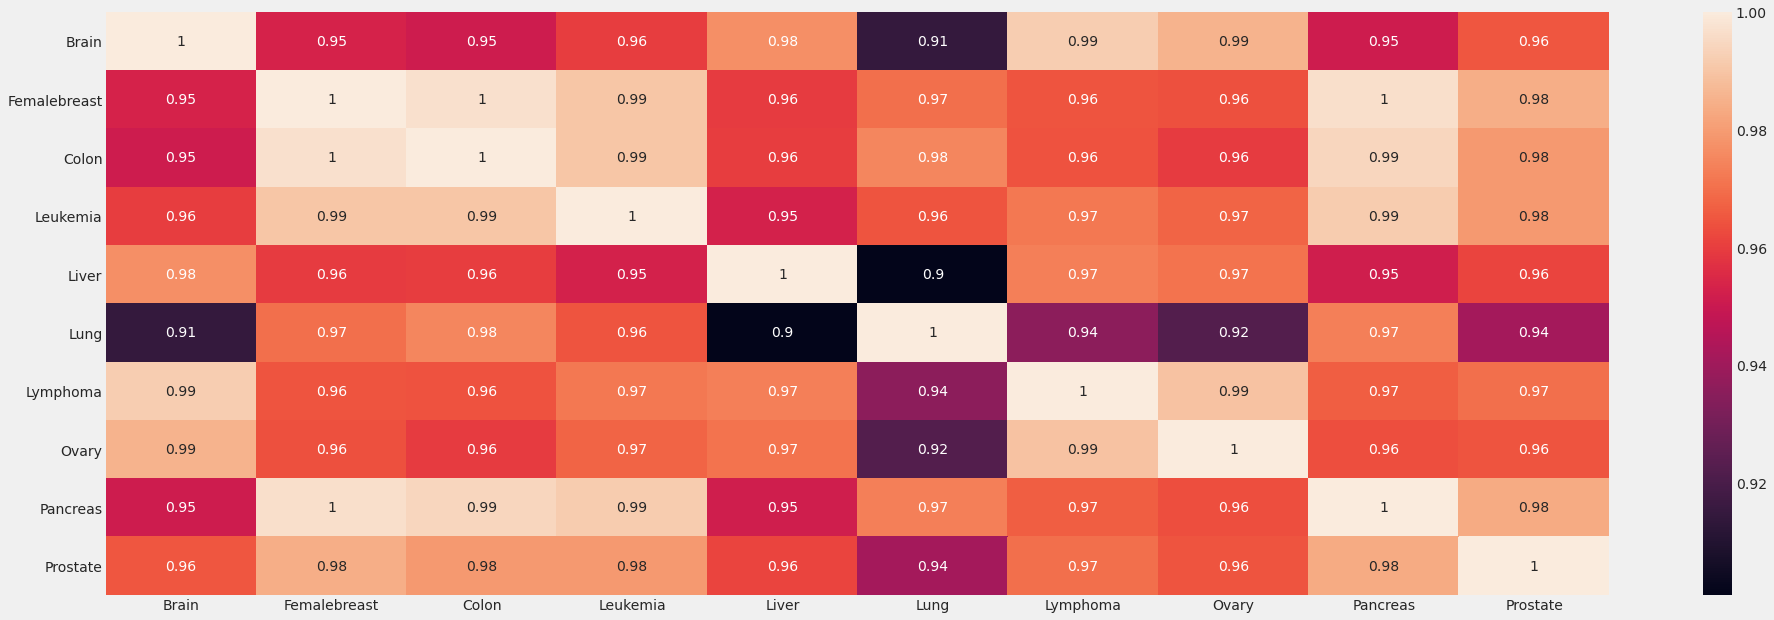

In [18]:
var=['State', 'Brain', 'Femalebreast', 'Colon', 'Leukemia', 'Liver', 'Lung','Lymphoma', 'Ovary', 'Pancreas', 'Prostate']
plt.figure(figsize=(30,10))
corr = df1[var].corr()
sns.heatmap(data=corr, annot=True);

#1) From the haetmap we can infer that liver and lung is very weakely correlated. where as Lung & bronchus, female Brest, leukemia, overy and prostate is highly correlated.
#2) The lighter the color correlation is strong and darker the color correlation is weak.

lets randomly observe some OLS(Ordinary least Squre Regression)

correlation in betwn Liver and Pancares: (0.9517653712734035, 8.570105981786123e-27)
                                 OLS Regression Results                                
Dep. Variable:                  Liver   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              892.8
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                    1.50e-33
Time:                        11:34:28   Log-Likelihood:                         -344.06
No. Observations:                  51   AIC:                                      690.1
Df Residuals:                      50   BIC:                                      692.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err   

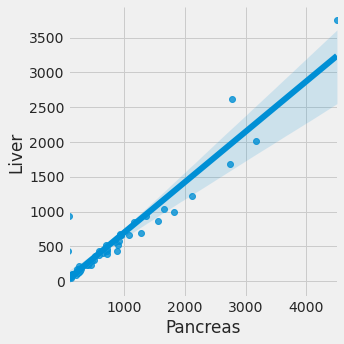

In [19]:
print('correlation in betwn Liver and Pancares:',pearsonr(df1.Liver, df1.Pancreas))
print(sm.OLS(df1.Liver, df1.Pancreas).fit().summary())
chart =sns.lmplot(y= 'Liver', x='Pancreas', data=df1)

correlation in betwn Lung and Prostate: (0.9414093968763966, 8.921055597722833e-25)
                                 OLS Regression Results                                
Dep. Variable:                   Lung   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                              785.3
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                    3.10e-32
Time:                        11:34:29   Log-Likelihood:                         -425.98
No. Observations:                  51   AIC:                                      854.0
Df Residuals:                      50   BIC:                                      855.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err    

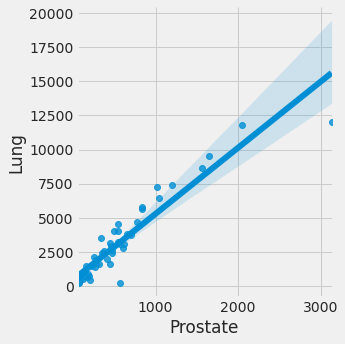

In [20]:
print('correlation in betwn Lung and Prostate:',pearsonr(df1.Lung, df1.Prostate))
print(sm.OLS(df1.Lung, df1.Prostate).fit().summary())
chart =sns.lmplot(y= 'Lung', x='Prostate', data=df1)

correlation in betwn barin and Ovary: (0.9853746990965495, 2.5291777918776012e-39)
                                 OLS Regression Results                                
Dep. Variable:                  Brain   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              3571.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                    3.60e-48
Time:                        11:34:30   Log-Likelihood:                         -278.40
No. Observations:                  51   AIC:                                      558.8
Df Residuals:                      50   BIC:                                      560.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err     

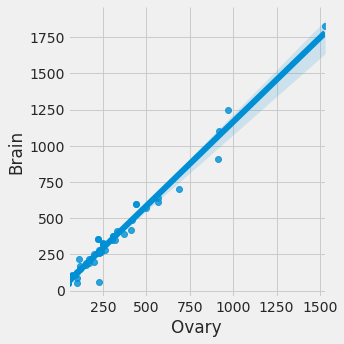

In [21]:
print('correlation in betwn barin and Ovary:',pearsonr(df1.Brain, df1.Ovary))
print(sm.OLS(df1.Brain, df1.Ovary).fit().summary())
chart =sns.lmplot(y= 'Brain', x='Ovary', data=df1)

correlation in betwn Liver and Lung & bronchus: (0.900865948966602, 2.1866608798005706e-19)
                                 OLS Regression Results                                
Dep. Variable:                  Liver   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                              416.5
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                    6.71e-26
Time:                        11:34:30   Log-Likelihood:                         -362.00
No. Observations:                  51   AIC:                                      726.0
Df Residuals:                      50   BIC:                                      727.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std

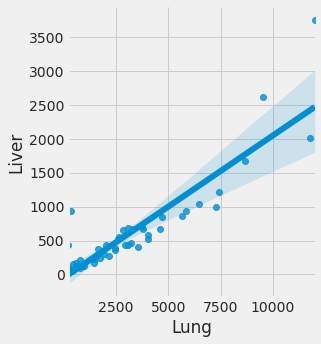

In [22]:
print('correlation in betwn Liver and Lung & bronchus:',pearsonr(df1.Liver, df1.Lung))
print(sm.OLS(df1.Liver, df1.Lung).fit().summary())
chart =sns.lmplot(y= 'Liver', x='Lung', data=df1)

#1) from all the above analysis we can see that log likely hood is come under-270 to -430 which not that much high as higher the log likelihood weaker the model or bad data. here we can infer that the data is not that much bad.
#2) AIC and BIC panalise the data. lower the AIC and BIC value indicates a better fit. here from the statistic it can be infer that it's not a bad one at the same time it's not a good also.
https://www.methodology.psu.edu/resources/AIC-vs-BIC/

# lets see a pair wise relationship in the dataset.
#1) As this data related to USA and in USA 'LUNG Cancer' is the second most prominent cancer so, lets see the pair wise relation of Lung cancer . (https://www.healthline.com/health/most-common-cancers)

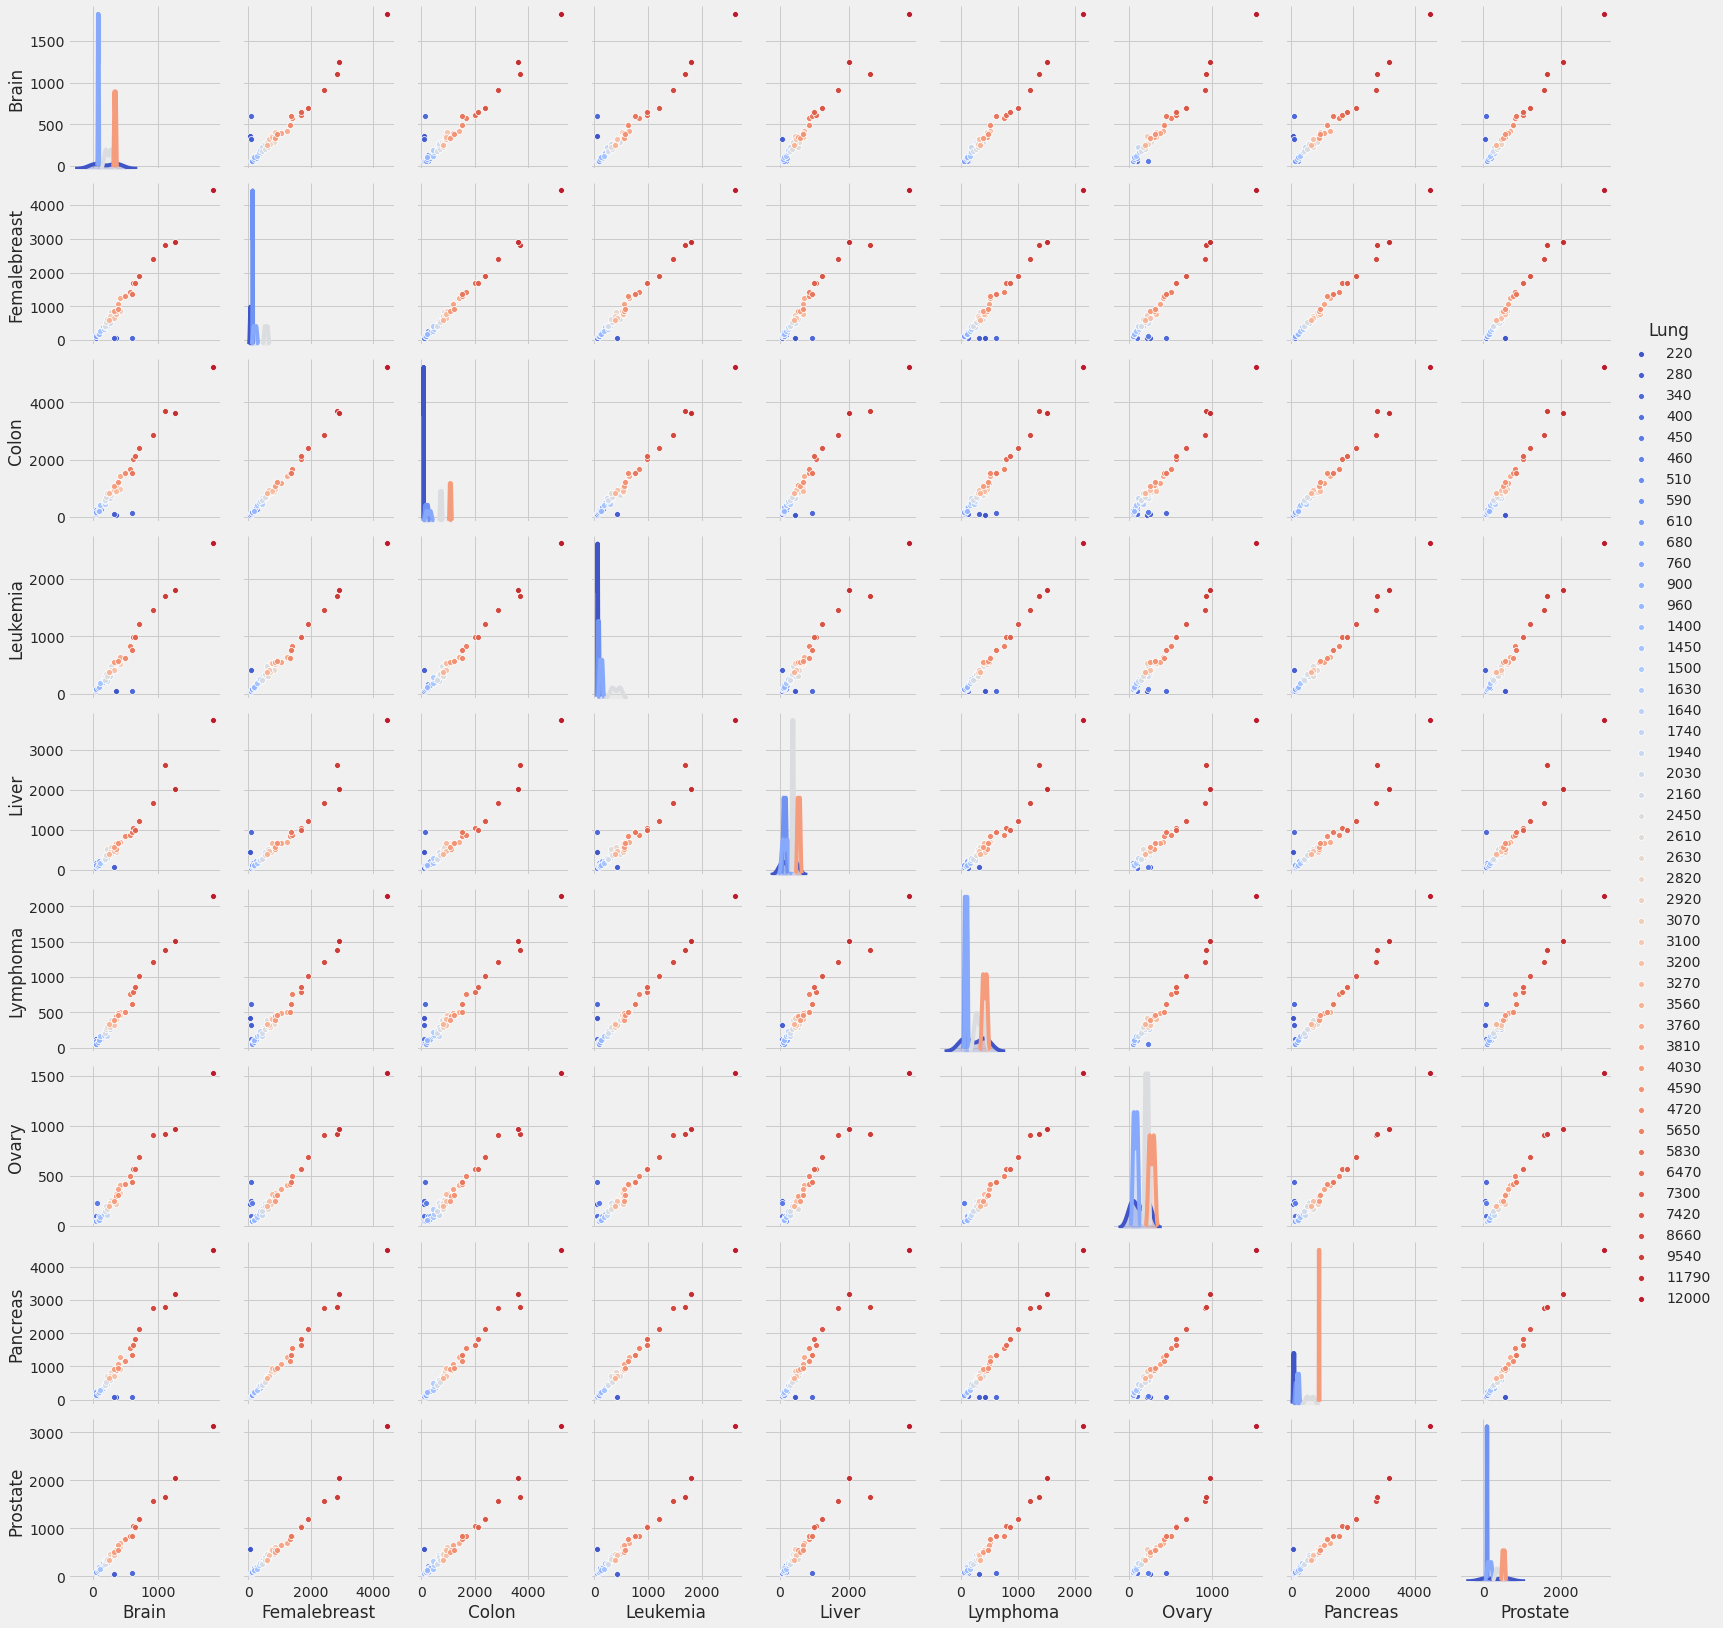

In [23]:
var=['Brain', 'Femalebreast', 'Colon', 'Leukemia', 'Liver','Lung','Lymphoma', 'Ovary', 'Pancreas', 'Prostate']
sns.pairplot(df1,palette='coolwarm',hue= 'Lung')

# state wise cancer count

In [24]:
var1=df1.loc[:, df.columns != 'State']
type(var1)
var1=list(var1)

In [25]:
type(var1)

list

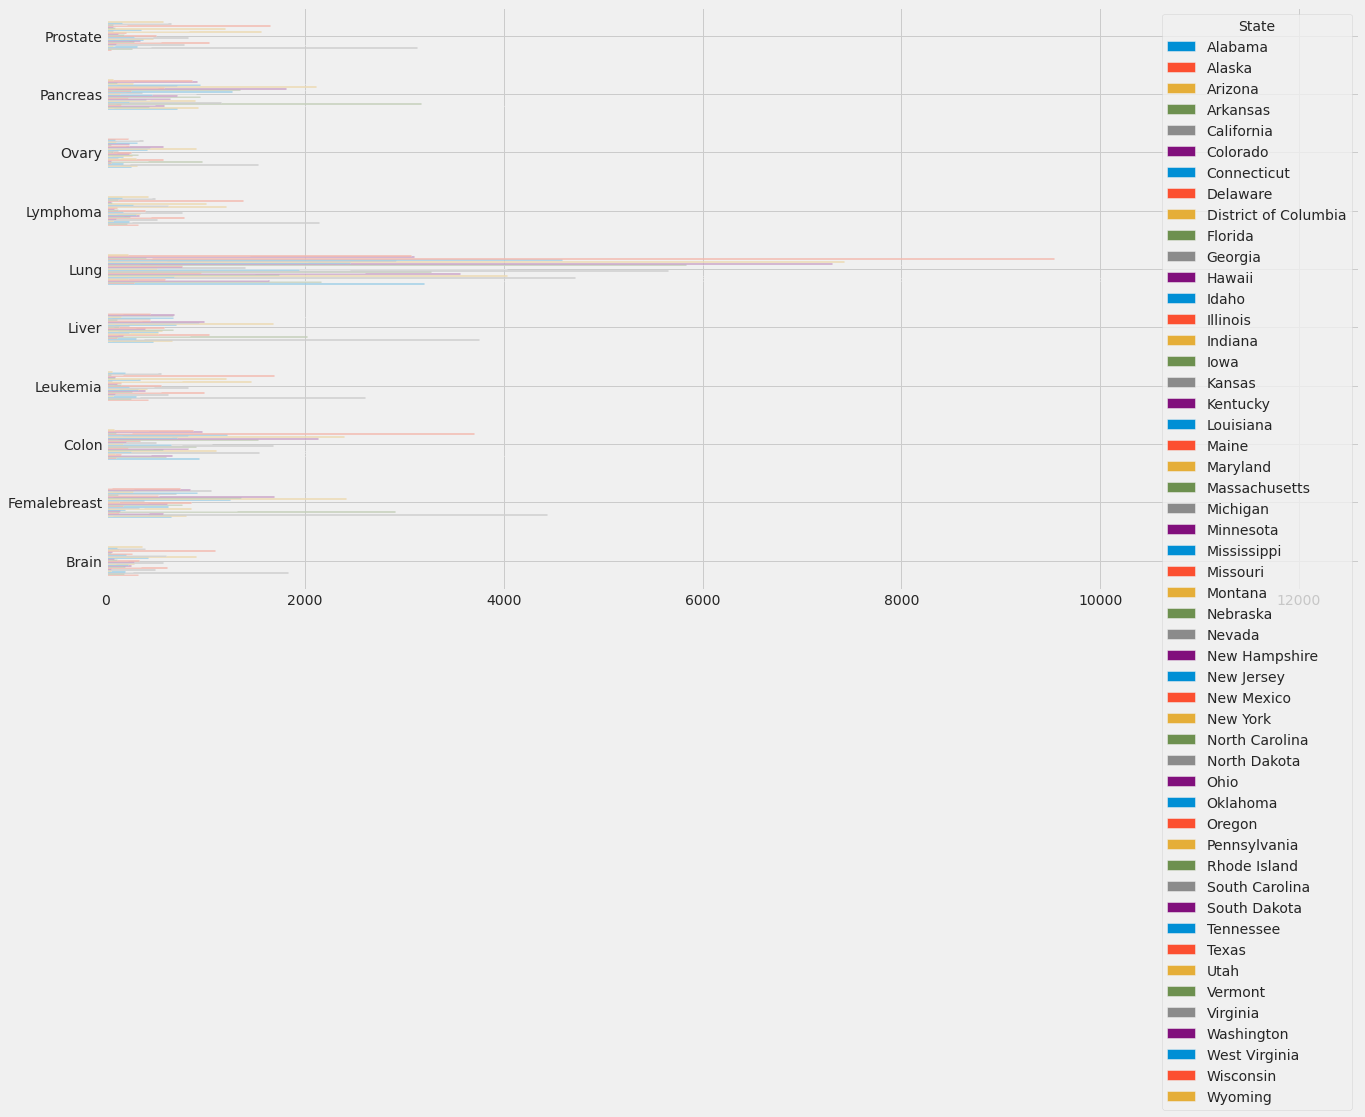

In [26]:
z = df1[var1].groupby(df1['State']).sum() #plotting the state w.r.t cancer
z.T.plot(kind='barh', figsize=(20,10));

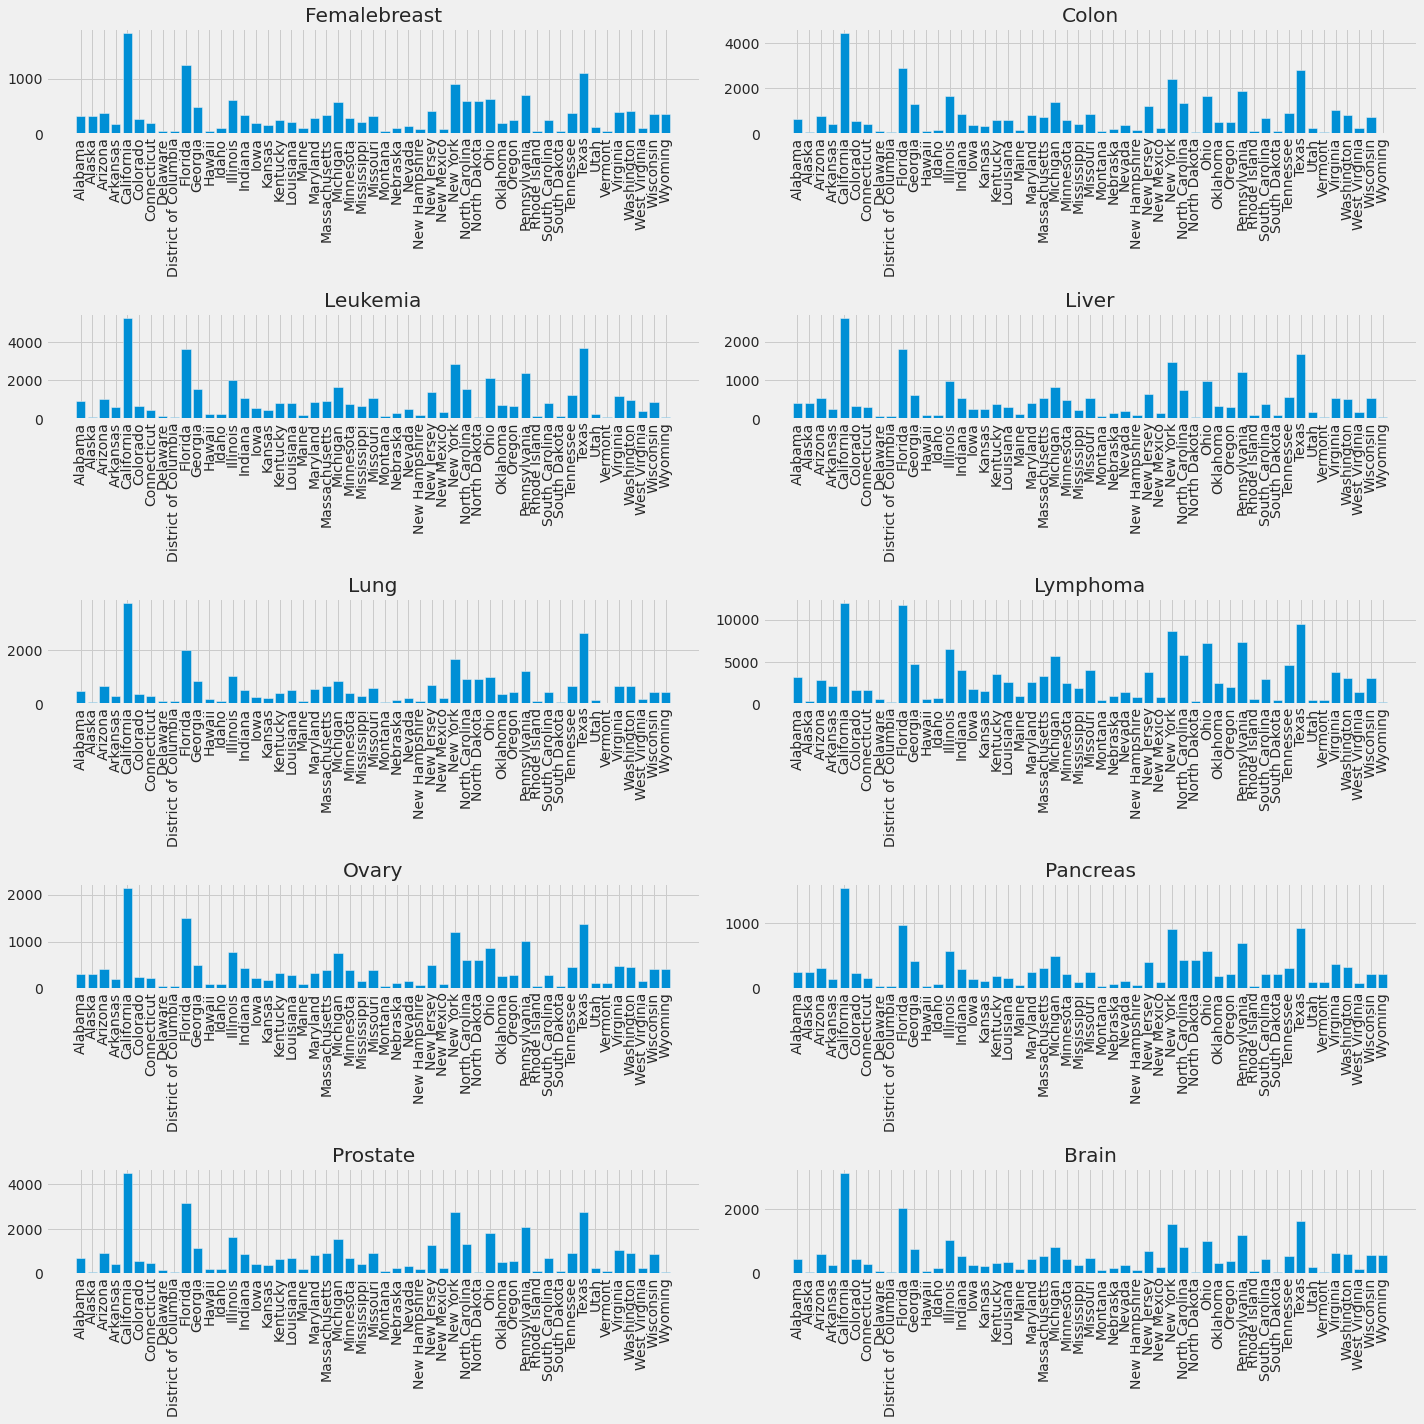

In [27]:
y=list(df1.columns)
x='State'
i=1
fig,ax=plt.subplots(nrows=5,ncols=2,figsize=(20,20))
for row in ax:
    for col in row:
        col.bar(df1[x],df1[y[i]])
        i=i+1
i=0
for ax in fig.axes:
    plt.title(var1[i])
    i=i+1
    plt.sca(ax)
    plt.xticks(rotation=90)
fig.tight_layout()
plt.show()

#1) From the Both ploting we can infer that California is the biggest hotspot for any cancer, second is Florida, 3rd is Texas.

In [28]:
s=df1.Brain+df1.Femalebreast+df1.Colon+df1.Leukemia+df1.Liver+df1.Lung+df1.Lymphoma+df1.Ovary+df1.Pancreas+df1.Prostate


In [29]:
df2=df1.assign(s=s)
df3=df2[['State','s']]
df3.head(10).style.background_gradient(cmap='Oranges')

,State,s
0,Alabama,7730.000000
1,Alaska,1950.000000
2,Arizona,8510.000000
3,Arkansas,4940.000000
4,California,41180.000000
5,Colorado,5390.000000
6,Connecticut,4500.000000
7,Delaware,1460.000000
8,District of Columbia,910.000000
9,Florida,31090.000000


In [30]:
fig = go.Figure(go.Funnelarea(text =df3.State,values = df3.s))
fig.show()

in the above one we can infer the percent of cancer in state wise. please hover the cursor on the plot. the plot is in an alphabetical order.

# PLOT WITH RESPECT TO MEAN OF EACH ROW

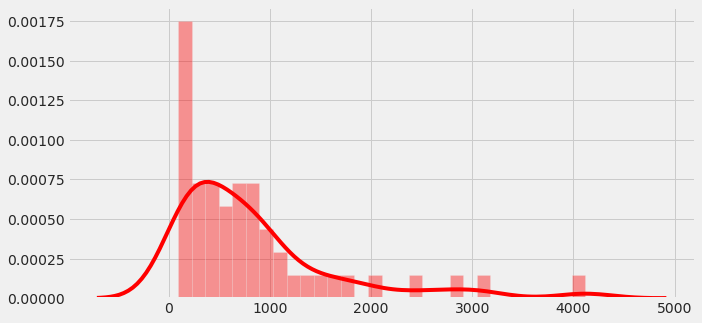

In [31]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
sns.distplot(df1[var1].mean(axis=1),bins=30,color='red');

# PLOT WITH RESPECT TO SD OF EACH ROW

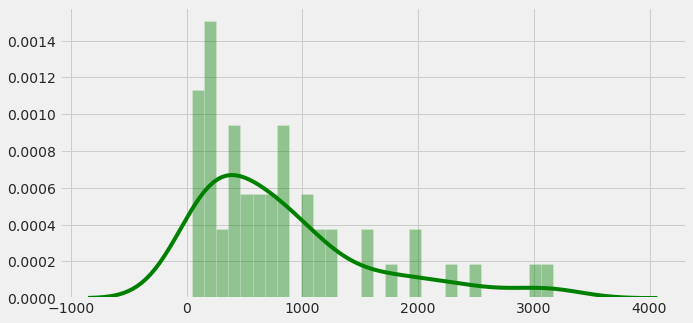

In [32]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
sns.distplot(df1[var1].std(axis=1),bins=30,color='green');

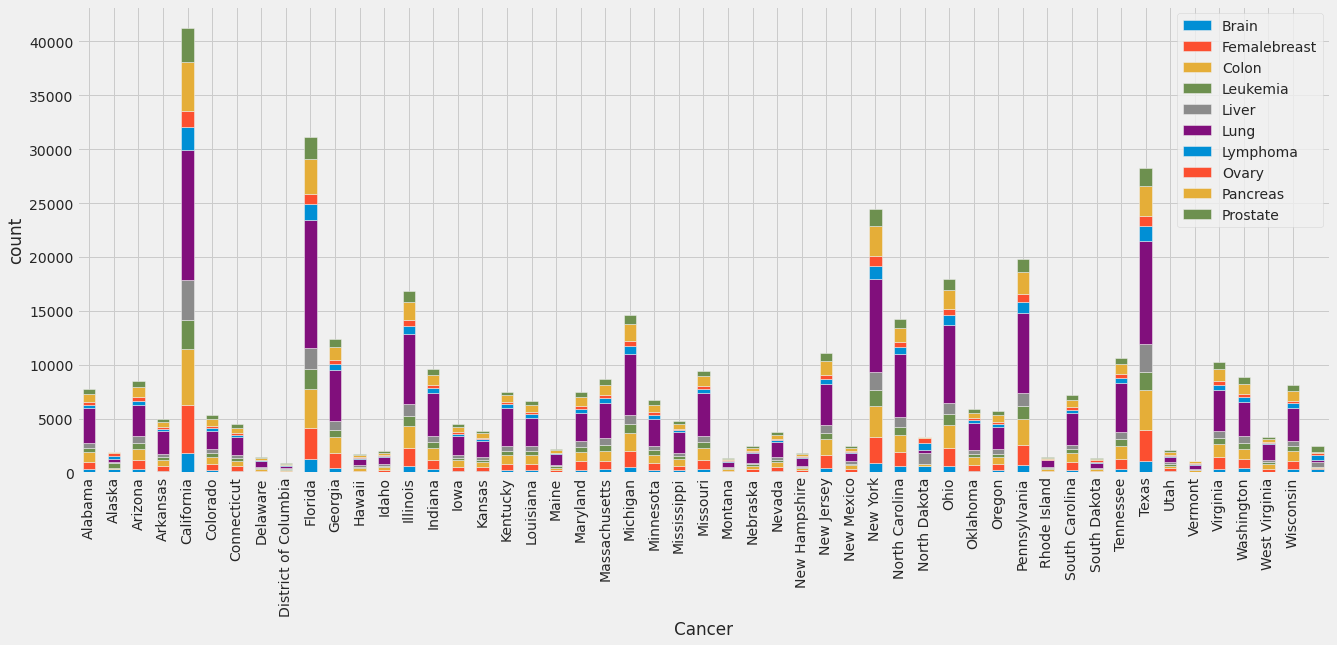

In [33]:
plt.rcParams['figure.figsize'] = (20, 8)
df1.plot(kind='bar', stacked=True);
labels = []
for r in df1.iloc[:,0]:
    labels.append(r)
plt.xticks(np.arange(50), labels, rotation=90);
plt.xlabel('Cancer');
plt.ylabel('count');

# Boxplot of numerical variables

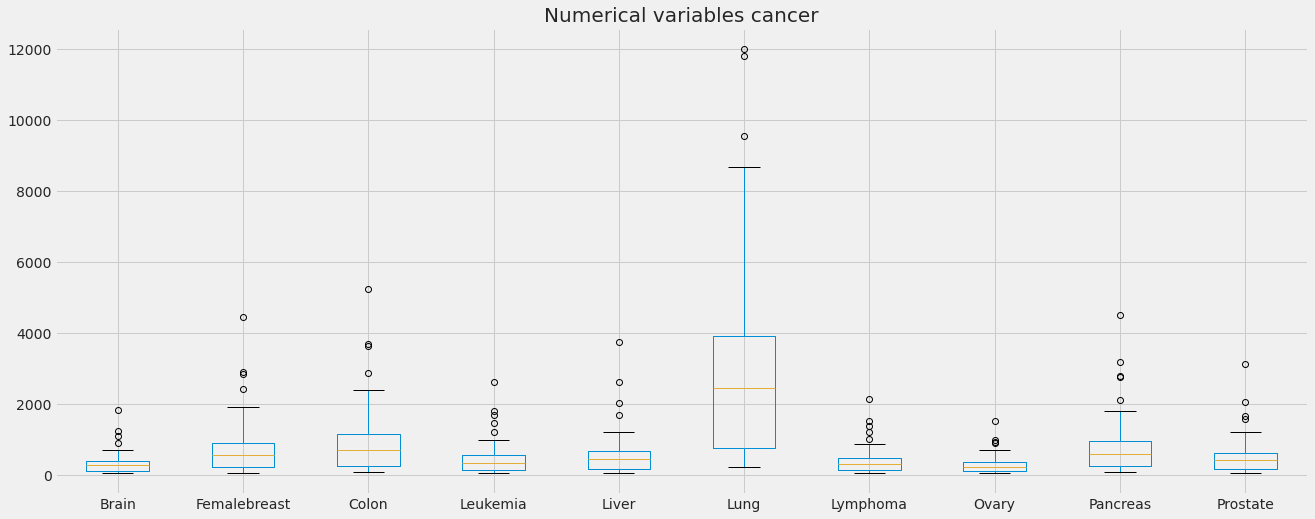

In [44]:
var=['Brain', 'Femalebreast', 'Colon', 'Leukemia', 'Liver','Lung','Lymphoma', 'Ovary', 'Pancreas', 'Prostate']
plt.figure(figsize=(20,8))
df1[var].boxplot()
plt.title("Numerical variables cancer", fontsize=20)
plt.show()

1) from the above box plot we can see that lung cancer is maximum, ovary is the minimum colon is the third one. except brain data, all other data is not that bad.


# Joint Distribution

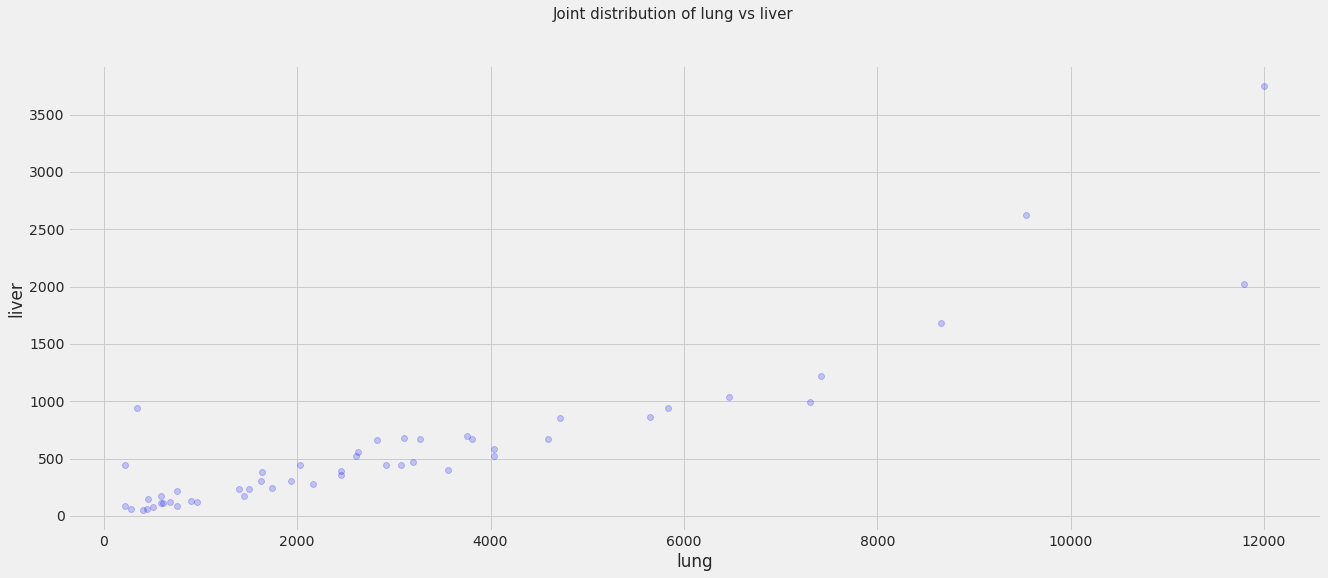

In [35]:
#lung vs liver
plt.figure(figsize=(20,8))
plt.xlabel("lung")
plt.ylabel("liver")
plt.suptitle("Joint distribution of lung vs liver", fontsize= 15)
plt.plot(df1['Lung'], df1['Liver'], 'bo', alpha=0.2)
plt.show()

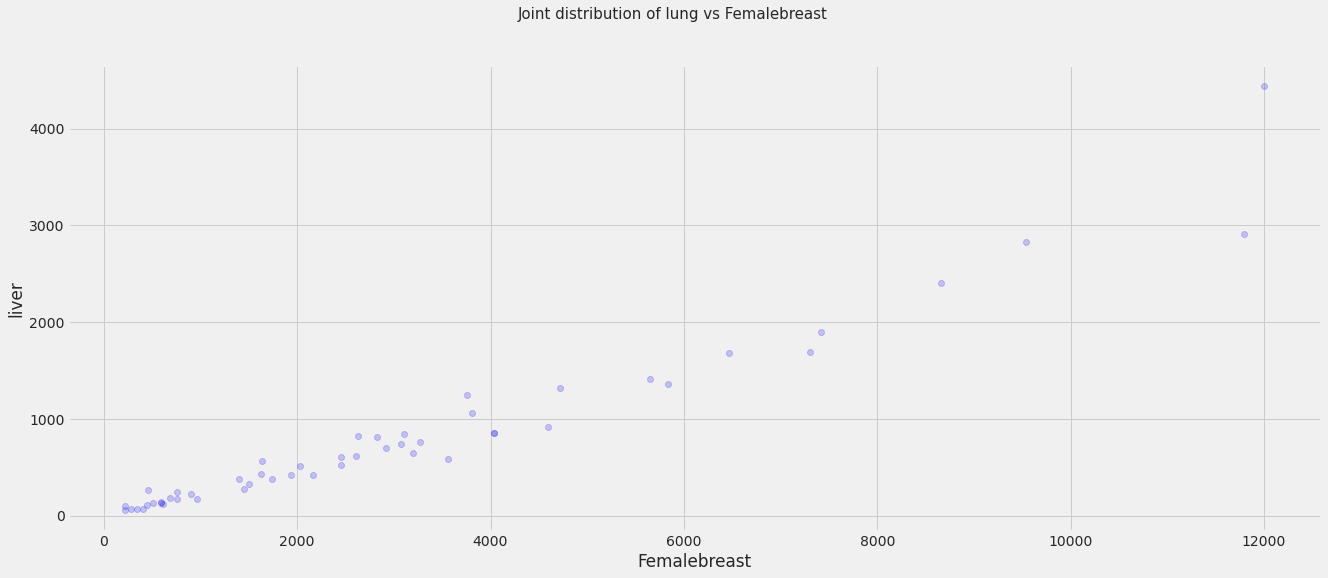

In [36]:
#lung vs brest
plt.figure(figsize=(20,8))
plt.xlabel("Femalebreast")
plt.ylabel("liver")
plt.suptitle("Joint distribution of lung vs Femalebreast", fontsize= 15)
plt.plot(df1['Lung'], df1['Femalebreast'], 'bo', alpha=0.2)
plt.show()

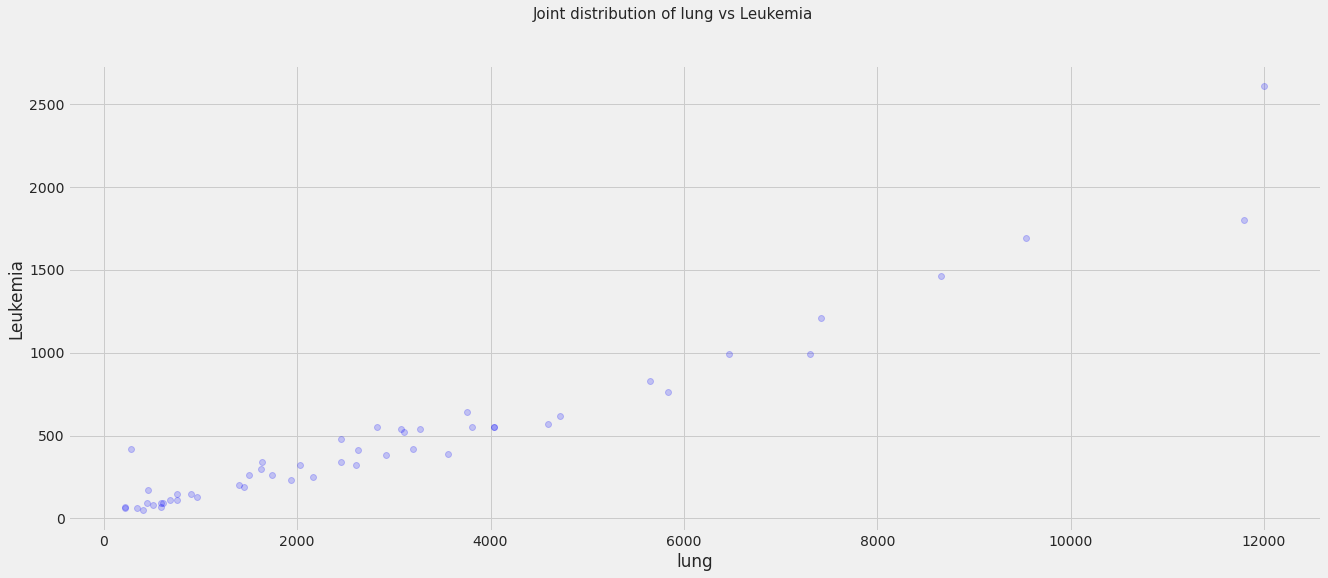

In [37]:
#lung vs leukemia
plt.figure(figsize=(20,8))
plt.xlabel("lung")
plt.ylabel("Leukemia")
plt.suptitle("Joint distribution of lung vs Leukemia", fontsize= 15)
plt.plot(df1['Lung'], df1['Leukemia'], 'bo', alpha=0.2)
plt.show()

#fig.set_size_inches(20,10)
#sns.scatterplot(x='Lung',y='Leukemia',data=df1, size = 20);

# * Conclusion

1) THE DATA SET IS SLIGHTLY SKWED AND NOT A PERFECT DATASET. DUE TO LESS AMOUNT OF DATA I THINK SKEWNESS IS THERE.

2) FROM OLS MODEL WE CAN INFER THAT THE DATA IS NOT HAVELIY PANALISED. WE CAN SEE THAT THERE IS GOOD MODEL IN BETWEEN LIVER, OVERY, PANCRES, PROSTATE CANCER.

3) IN CANCER TYPE THE LUNG CANCER IS THE MOST COMMON FORM AMONG ALL THE CANCER, FOLLOWE BY PROSTATE, BREAST AND COLON CANCER.

4) CALIFORNIA IS THE LEADING STATE IN ALL CANCER WHERE AS SOME TYPE OF CANCER CANT BE FOUND IN VERMONT. CALIFORNIA IS FOLLOWED BY FLORIDA, TEXAS AND NEW YORK.